In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io 
from skimage.color import rgb2gray

In [2]:
def PrintArrayInfo(a):
    print("Array info:")
    print("shape:", a.shape)
    print("dtype:", a.dtype)
    print("min, max:", a.min(), a.max())
    print()

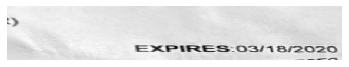

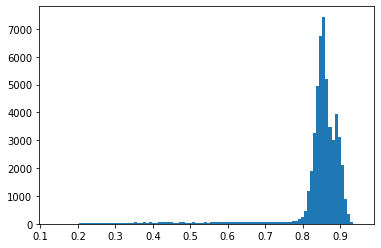

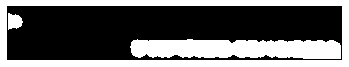

Array info:
shape: (91, 569)
dtype: float64
min, max: 0.0 1.0



In [3]:
# choose file directory
image0 = io.imread('./18586548.png')

# convert to black and white
image1 = rgb2gray(image0)
plt.axis('off') # turn off axis labels
plt.imshow(image1,cmap='gray')
plt.show()

# spectral analysis to set cut-off point
plt.hist(image1.ravel(),100)
plt.show()

# use the cut-off point to extract background from text
val = 0.5
image_bw1 = (image1 >  val)
image_bw2 = (image1 <= val)
#plt.axis('off') # turn off axis labels
#plt.imshow(image_bw1,cmap='gray')
#plt.show()

# over-cut the text to ensure clean removal of the text
from skimage.morphology import disk, erosion, dilation, opening, closing 
selector = disk(10)
image_morph1 = erosion(image_bw1, selector)
image_morph2 = erosion(image_bw2, selector) 

image_orig = io.imread('./18586548.png')
mask = np.zeros(image_orig.shape[:-1])
for i in range(1,90):
    for j in range(1,568):
        if image_morph1[i,j]<0.5:
            mask[i:(i+1),j:(j+1)]=1
plt.axis('off')
plt.imshow(mask,cmap='gray')
plt.show()
PrintArrayInfo(mask)

/Applications/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:504: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/Applications/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:506: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
/Applications/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:504: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/Applications/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:506: FutureWarning: future versions will not create a writeable arr

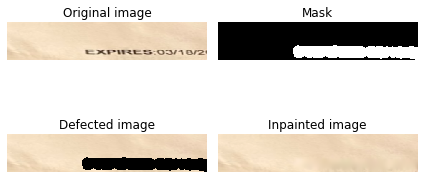

In [4]:
# remove text and recover background with inpainting 
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.restoration import inpaint

# Create mask with three defect regions: left, middle, right respectively

# testing above

# Defect image over the same region in each color channel
image_defect = image_orig.copy()
for layer in range(image_defect.shape[-1]):
    image_defect[np.where(mask)] = 0

image_result = inpaint.inpaint_biharmonic(image_defect, mask,
                                          multichannel=True)

image_orig_adj = image_orig[0:91,30:509]
mask_adj = mask[0:91,30:509]
image_defect_adj = image_defect[0:91,30:509]
image_result_adj = image_result[0:91,30:509]
image_result_square = image_result[0:28,30:58]
io.imsave('./new_background.png', image_result_adj) 
io.imsave('./new_background_28x28.png', image_result_square) 

fig, axes = plt.subplots(ncols=2, nrows=2)
ax = axes.ravel()

ax[0].set_title('Original image')
ax[0].imshow(image_orig_adj)

ax[1].set_title('Mask')
ax[1].imshow(mask_adj, cmap=plt.cm.gray)

ax[2].set_title('Defected image')
ax[2].imshow(image_defect_adj)

ax[3].set_title('Inpainted image')
ax[3].imshow(image_result_adj)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()


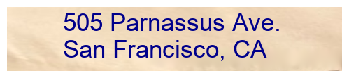

In [5]:
# example of drawing texts onto the extracted new background
from PIL import Image, ImageDraw, ImageFont

img = Image.open('./new_background.png')

fnt = ImageFont.truetype('/Library/Fonts/Arial.ttf', 35)
d = ImageDraw.Draw(img)
d.text((80,2), "505 Parnassus Ave.", font=fnt, fill=(0, 0, 139))
d.text((80,40), "San Francisco, CA", font=fnt, fill=(0, 0, 139))

#img.save('pil_text_font.png')
plt.axis('off')
plt.imshow(img)
plt.show()

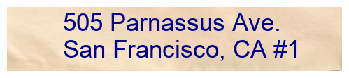

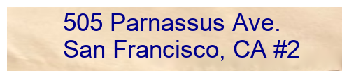

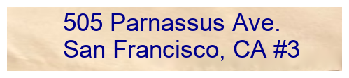

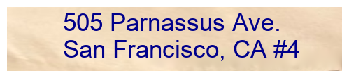

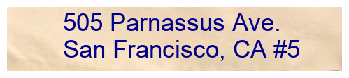

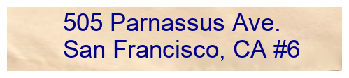

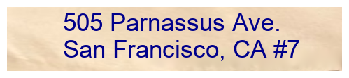

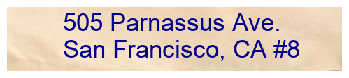

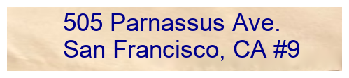

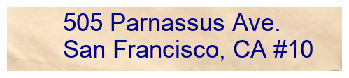

In [6]:
# replace many images iteratively with the new background
for i in range(0,10):
    # Open your two images
    img = Image.open('./new_background.png')
    fnt = ImageFont.truetype('/Library/Fonts/Arial.ttf', 35)
    d = ImageDraw.Draw(img)
    d.text((80,2), "505 Parnassus Ave.", font=fnt, fill=(0, 0, 139))
    d.text((80,40), "San Francisco, CA #"+str(i+1), font=fnt, fill=(0, 0, 139))

# Save it!
    img.save("new"+str(i+1)+".png", "PNG")

    plt.axis('off')
    plt.imshow(img)
    plt.show()
